# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | mazagao
Processing Record 5 of Set 1 | oulainen
Processing Record 6 of Set 1 | chibougamau
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | petropavlovsk-kamchatsky
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | cobija
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | coos bay
Processing Record 15 of Set 1 | estevan
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | dubbo
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | kingston
Processing Record 23 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,291.38,82,8,4.02,NZ,1704331711
1,whitehorse,60.7161,-135.0538,261.58,84,100,2.06,CA,1704331712
2,puerto natales,-51.7236,-72.4875,283.87,91,100,1.72,CL,1704331712
3,mazagao,-0.1150,-51.2894,301.18,90,100,1.64,BR,1704331713
4,oulainen,64.2667,24.8000,244.71,100,12,1.62,FI,1704331715


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,291.38,82,8,4.02,NZ,1704331711
1,whitehorse,60.7161,-135.0538,261.58,84,100,2.06,CA,1704331712
2,puerto natales,-51.7236,-72.4875,283.87,91,100,1.72,CL,1704331712
3,mazagao,-0.1150,-51.2894,301.18,90,100,1.64,BR,1704331713
4,oulainen,64.2667,24.8000,244.71,100,12,1.62,FI,1704331715


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

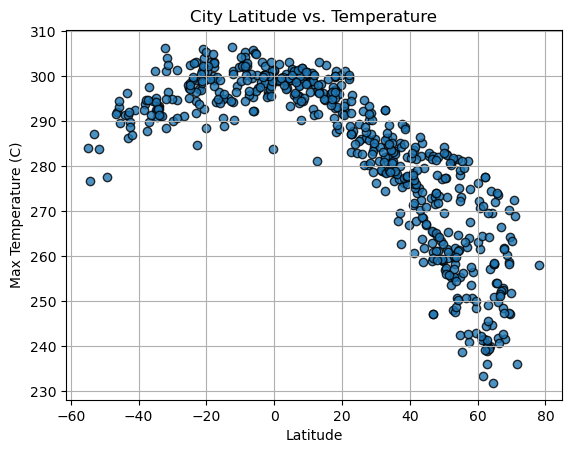

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

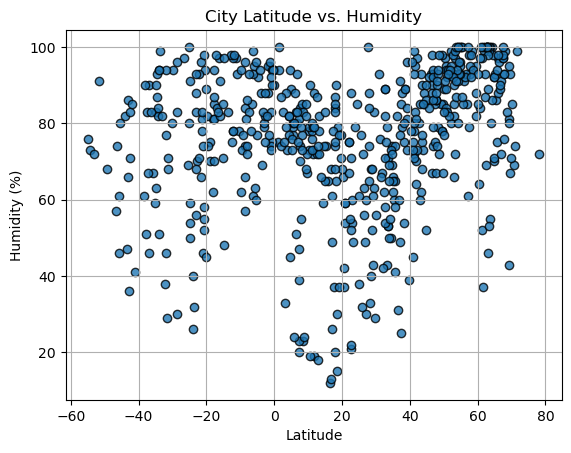

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

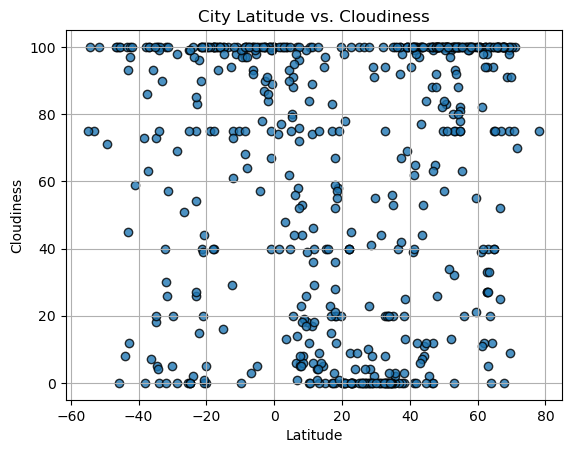

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

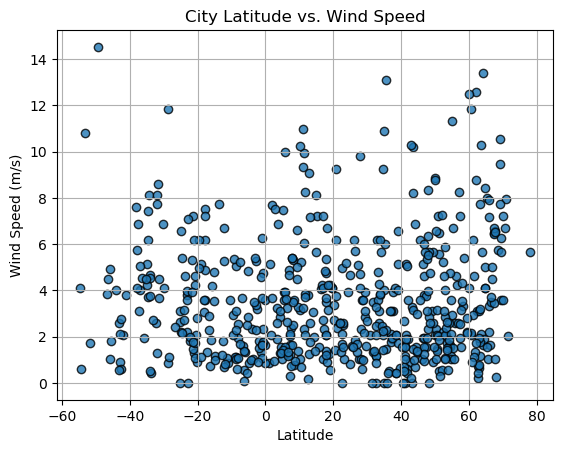

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y):
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, color="red")
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
   
    print(f"The r-value is {r_value}")


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,261.58,84,100,2.06,CA,1704331712
4,oulainen,64.2667,24.8000,244.71,100,12,1.62,FI,1704331715
5,chibougamau,49.9168,-74.3659,258.94,85,100,2.06,CA,1704331715
7,albany,42.6001,-73.9662,275.17,80,97,0.89,US,1704331716
8,yellowknife,62.4560,-114.3525,244.44,69,100,3.09,CA,1704331716


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,291.38,82,8,4.02,NZ,1704331711
2,puerto natales,-51.7236,-72.4875,283.87,91,100,1.72,CL,1704331712
3,mazagao,-0.1150,-51.2894,301.18,90,100,1.64,BR,1704331713
6,adamstown,-25.0660,-130.1015,297.27,80,99,2.62,PN,1704331459
11,cobija,-11.0267,-68.7692,297.81,93,100,0.85,BO,1704331718


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.875493523322764


Text(0, 0.5, 'Max Temp')

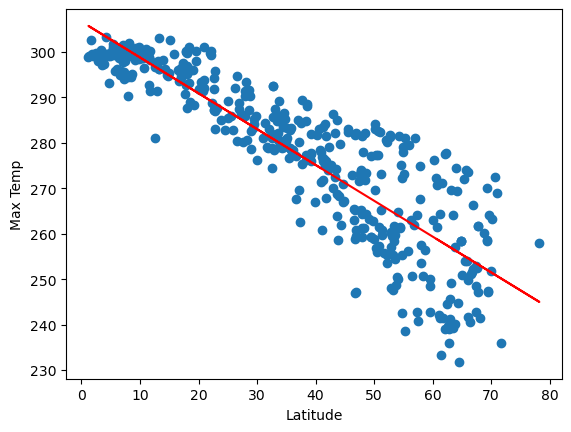

In [53]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")



The r-value is 0.5586077991336807


Text(0, 0.5, 'Max Temp')

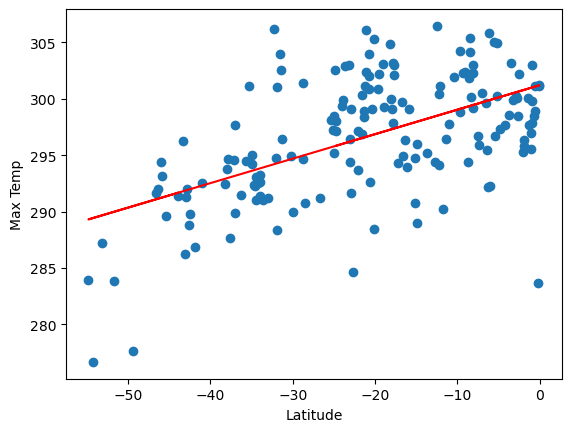

In [54]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** There is a somewhat strong correlation between maximum temperature and a cities latitude in both the Northern and Southern ( abit stronger in the Southern) hemispheres. The closer a city is to the equater, the higher the max temps become.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.43430448008141603


Text(0, 0.5, 'Humidity')

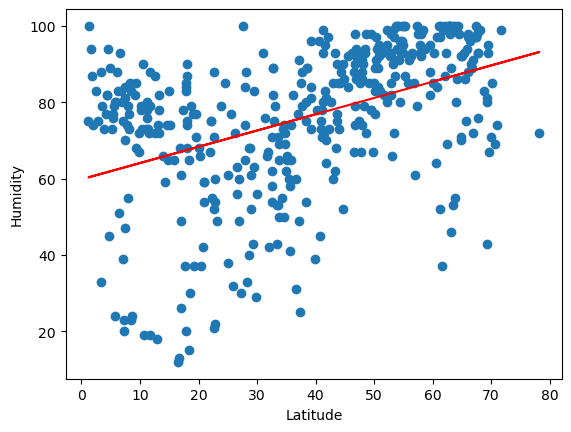

In [55]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is 0.2979244341597051


Text(0, 0.5, 'Humidity')

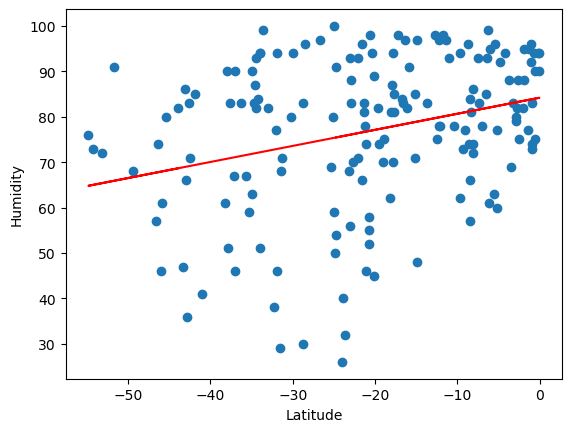

In [56]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** There is very weak correlation between latitude and humidity for both hemispheres. You can make an arguement that cities in the southern hemisphere closer to the equator have higher humidity but overall the plot is too broad to confirm this.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3697056150886963


Text(0, 0.5, 'Cloudiness')

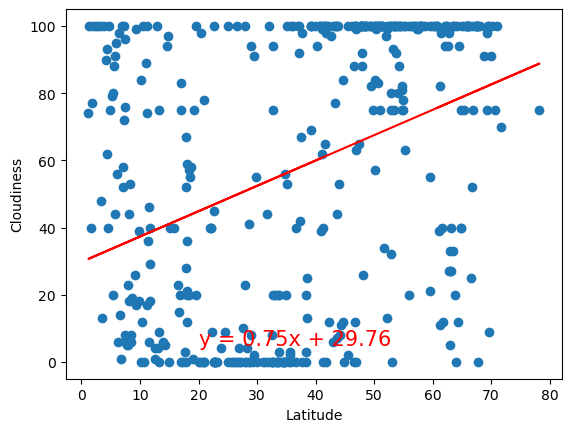

In [57]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is 0.22786144480963344


Text(0, 0.5, 'Cloudiness')

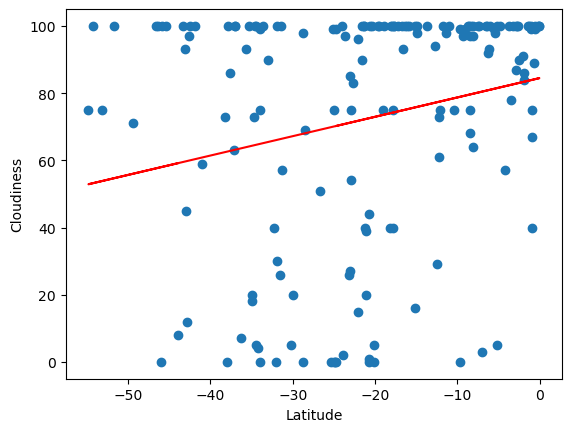

In [58]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** There is no correlation between cloudiness and a city's latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.08936181803669457


Text(0, 0.5, 'Wind Speed')

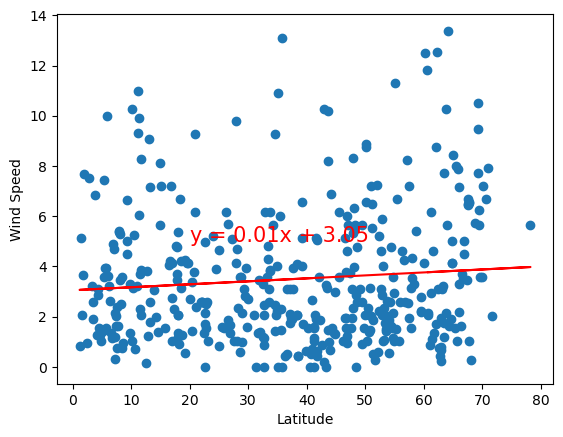

In [60]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is -0.276190332735871


Text(0, 0.5, 'Wind Speed')

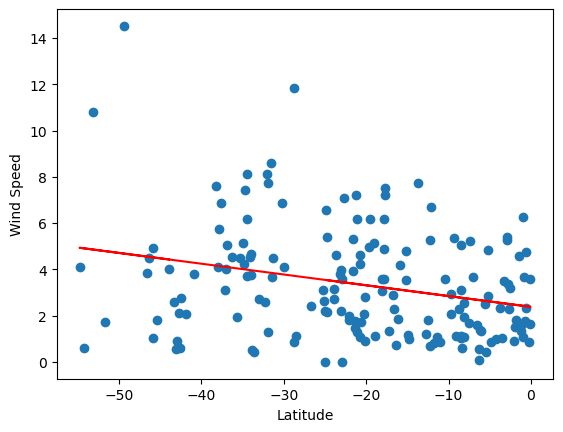

In [61]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
plot_linear_regression(x, y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** There is very weak correlation between wind speed and latitude for both hemispheres.